In [1]:
import torch
import torch.nn as nn     # ネットワーク構造つくるときに必要
import torch.optim as optim    # 最適化アルゴリズムを使うときに必要
import matplotlib.pyplot as plt
%matplotlib inline

print("Pytorch Version", torch.__version__)
print("環境設定完了")

Pytorch Version 2.4.1+cu121
環境設定完了


In [2]:
# データセットの作成
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

print("入力 X:")
print(X)
print("\n出力 y:")
print(y)

入力 X:
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

出力 y:
tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [3]:
# モデルの定義
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()        # 親クラスの初期化
        self.linear = nn.Linear(input_size, 1)    # 入力:input_size、出力:1
        self.sigmoid = nn.Sigmoid()               # シグモイド関数

        # 重みの初期化
        nn.init.kaiming_uniform_(self.linear.weight)  # 重みを乱数で初期化
        nn.init.zeros_(self.linear.bias)              # バイアスを0に初期化

    def forward(self, x):    # 計算の順序
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

# 再現性のためのシード設定
torch.manual_seed(42)

# モデルの作成
model = Perceptron(input_size=2)
print(model)

# 初期の重み
print("初期の重み:", model.linear.weight.data)
print("初期のバイアス:", model.linear.bias.data)

Perceptron(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
初期の重み: tensor([[ 1.5911, -0.3795]])
初期のバイアス: tensor([0.])


In [4]:
# 損失関数
criterion = nn.BCELoss()

# 最適化アルゴリズム
optimizer = optim.SGD(model.parameters(), lr=0.1)

print("損失関数:", criterion)
print("最適化アルゴリズム:", optimizer)

損失関数: BCELoss()
最適化アルゴリズム: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [5]:
# 学習前（初期状態）での予測
with torch.no_grad():    # 勾配計算なし
    initial_predictions = model(X)
    initial_loss = criterion(initial_predictions, y)

print("初期パラメータでの予測:")
for x_i, y_i , pred in zip(X, y, initial_predictions):
    print(f"入力:{x_i.tolist()}, 正解:{y_i.item()}, 予測:{pred.item():.4f}")

print(f"\n初期損失: {initial_loss.item():.4f}")

初期パラメータでの予測:
入力:[0.0, 0.0], 正解:0.0, 予測:0.5000
入力:[0.0, 1.0], 正解:0.0, 予測:0.4062
入力:[1.0, 0.0], 正解:0.0, 予測:0.8308
入力:[1.0, 1.0], 正解:1.0, 予測:0.7706

初期損失: 0.8129


In [7]:
# 学習ループの実装
def train(model, X, y, criterion, optimizer, epochs=1000):
    history = {'loss':[], 'accuracy':[]}
    for epoch in range(epochs):
        y_pred = model(X)              # 予測
        loss = criterion(y_pred, y)    # 損失の計算
        optimizer.zero_grad()          # 勾配の初期化
        loss.backward()                # 勾配の計算
        optimizer.step()               # パラメータの更新

        # 精度の計算
        with torch.no_grad():
            y_pred_class = (y_pred >= 0.5).float()           # 0.5以上なら1.0にする
            accuracy = (y_pred_class == y).float().mean()    # 予測と正解が一致している数

        # 履歴の記録
        history['loss'].append(loss.item())
        history['accuracy'].append(accuracy.item())

        # 表示
        if epoch%100 == 0:
            print(f"Epoch {epoch}, Loss:{loss.item():.4f}, Accuracy:{accuracy.item():.4f}")

    return history

# 学習の実行
epochs = 5000
history = train(model, X, y, criterion, optimizer, epochs=epochs)


Epoch 0, Loss:0.7964, Accuracy:0.7500
Epoch 100, Loss:0.4277, Accuracy:0.7500
Epoch 200, Loss:0.3376, Accuracy:1.0000
Epoch 300, Loss:0.2826, Accuracy:1.0000
Epoch 400, Loss:0.2447, Accuracy:1.0000
Epoch 500, Loss:0.2166, Accuracy:1.0000
Epoch 600, Loss:0.1945, Accuracy:1.0000
Epoch 700, Loss:0.1767, Accuracy:1.0000
Epoch 800, Loss:0.1619, Accuracy:1.0000
Epoch 900, Loss:0.1493, Accuracy:1.0000
Epoch 1000, Loss:0.1386, Accuracy:1.0000
Epoch 1100, Loss:0.1293, Accuracy:1.0000
Epoch 1200, Loss:0.1211, Accuracy:1.0000
Epoch 1300, Loss:0.1139, Accuracy:1.0000
Epoch 1400, Loss:0.1074, Accuracy:1.0000
Epoch 1500, Loss:0.1017, Accuracy:1.0000
Epoch 1600, Loss:0.0965, Accuracy:1.0000
Epoch 1700, Loss:0.0918, Accuracy:1.0000
Epoch 1800, Loss:0.0875, Accuracy:1.0000
Epoch 1900, Loss:0.0836, Accuracy:1.0000
Epoch 2000, Loss:0.0800, Accuracy:1.0000
Epoch 2100, Loss:0.0767, Accuracy:1.0000
Epoch 2200, Loss:0.0736, Accuracy:1.0000
Epoch 2300, Loss:0.0708, Accuracy:1.0000
Epoch 2400, Loss:0.0682, Acc

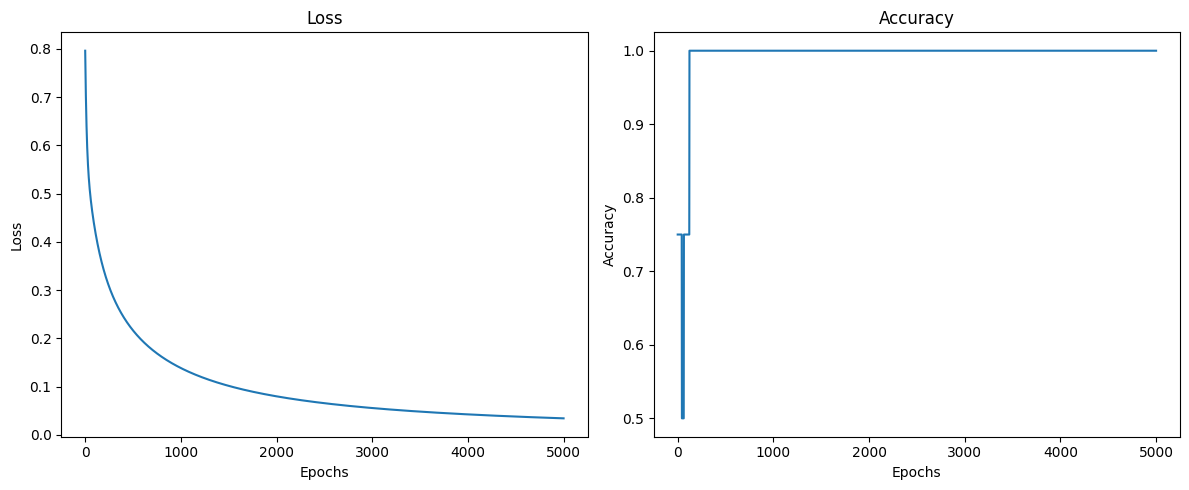

In [8]:
# グラフ
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.tight_layout()
plt.show()

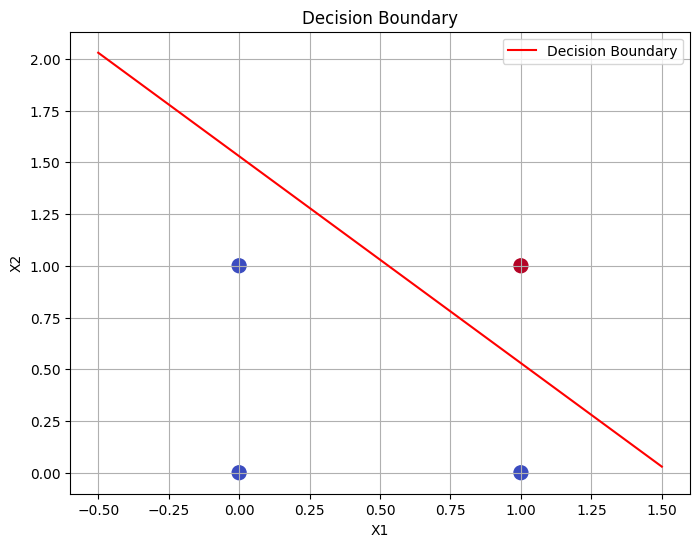

In [10]:
with torch.no_grad():
    weights = model.linear.weight.numpy()
    bias = model.linear.bias.numpy()

plt.figure(figsize=(8, 6))
x1 = torch.linspace(-0.5, 1.5, 100)
x2 = -(weights[0, 0] * x1 + bias) / weights[0, 1]
plt.plot(x1, x2, 'r-', label="Decision Boundary")
plt.scatter(X[:, 0], X[:, 1], c=y.numpy(), cmap='coolwarm', s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
with torch.no_grad():
    final_predictions = model(X)

    print("最終的な予測:")
    for x_i, y_i, pred in zip(X, y, final_predictions):
        print(f"入力:{x_i.tolist()}, 正解:{y_i.item()}, 予測:{pred.item():.4f}")

    # パラメータの取得
    weights = model.linear.weight.detach().numpy()
    bias = model.linear.bias.detach().numpy()

    print("\n最終的なパラメータ:")
    print("重み:", weights.flatten())
    print("バイアス:", bias.item())

# モデルの保存
torch.save(model.state_dict(), 'and_gate_perceptron.pth')
print("\nモデルの保存が完了しました。")

最終的な予測:
入力:[0.0, 0.0], 正解:0.0, 予測:0.0001
入力:[0.0, 1.0], 正解:0.0, 予測:0.0395
入力:[1.0, 0.0], 正解:0.0, 予測:0.0395
入力:[1.0, 1.0], 正解:1.0, 予測:0.9447

最終的なパラメータ:
重み: [6.030322  6.0302806]
バイアス: -9.222635269165039

モデルの保存が完了しました。
